Realizar tres visualizaciones que expliquen los datos del TP utilizando los siguientes tipos de plots: Histograma, Violin plot o Box plot, Heatmap. Realizar un plot sobre los datos, utilizando un tipo de plot que no sea ninguno de los usados en el punto uno, que permita mostrar el comportamiento o interacción de al menos tres variables.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


Cargo el csv y salto la línea 10474 (que es el index 10472 y row 10473 al cargarlo) porque está parseada mal.

In [3]:
play_store = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/googleplaystore.csv", skiprows = [10473])

In [4]:
play_store

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10835,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10836,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10837,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10838,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [5]:
play_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10840 entries, 0 to 10839
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.1+ MB


Modifico datos visuales del dataframe play_store por conveniencia para las visualizaciones.

In [6]:
# Le saco la coma y el + al número de instalaciones.
play_store["Installs"] = play_store["Installs"].str.replace(",", "")
play_store["Installs"] = play_store["Installs"].str.replace("+", "", regex = True).astype(int)

# Cambio el nombre de los tipos y las categorías del inglés al español para mostrarlo en las visualizaciones.
play_store["Type"] = play_store["Type"].replace("Free", "Gratis")
play_store["Type"] = play_store["Type"].replace("Paid", "Pago")
play_store["Category"] = play_store["Category"].replace("ART_AND_DESIGN", "Arte y Diseño")
play_store["Category"] = play_store["Category"].replace("FAMILY", "Familia")
play_store["Category"] = play_store["Category"].replace("MEDICAL", "Médica")
play_store["Category"] = play_store["Category"].replace("BOOKS_AND_REFERENCE", "Libros y Referencias")
play_store["Category"] = play_store["Category"].replace("LIFESTYLE", "Estilo de Vida")
play_store["Category"] = play_store["Category"].replace("AUTO_AND_VEHICLES", "Autos y Vehículos")
play_store["Category"] = play_store["Category"].replace("FINANCE", "Finanzas")
play_store["Category"] = play_store["Category"].replace("BUSINESS", "Negocios")
play_store["Category"] = play_store["Category"].replace("BEAUTY", "Belleza")
play_store["Category"] = play_store["Category"].replace("COMICS", "Cómics")
play_store["Category"] = play_store["Category"].replace("WEATHER", "Clima")
play_store["Category"] = play_store["Category"].replace("SPORTS", "Deportes")
play_store["Category"] = play_store["Category"].replace("COMMUNICATION", "Comunicación")
play_store["Category"] = play_store["Category"].replace("DATING", "Citas")
play_store["Category"] = play_store["Category"].replace("EDUCATION", "Educación")
play_store["Category"] = play_store["Category"].replace("ENTERTAINMENT", "Entretenimiento")
play_store["Category"] = play_store["Category"].replace("EVENTS", "Eventos")
play_store["Category"] = play_store["Category"].replace("FOOD_AND_DRINK", "Comida y Bebidas")
play_store["Category"] = play_store["Category"].replace("GAME", "Juegos")
play_store["Category"] = play_store["Category"].replace("HEALTH_AND_FITNESS", "Salud y Físico")
play_store["Category"] = play_store["Category"].replace("HOUSE_AND_HOME", "Casa y Hogar")
play_store["Category"] = play_store["Category"].replace("LIBRARIES_AND_DEMO", "Librerías y Demos")
play_store["Category"] = play_store["Category"].replace("MAPS_AND_NAVIGATION", "Mapas y Navegación")
play_store["Category"] = play_store["Category"].replace("NEWS_AND_MAGAZINES", "Noticias y Revistas")
play_store["Category"] = play_store["Category"].replace("PARENTING", "Cuidado de Hijos")
play_store["Category"] = play_store["Category"].replace("PERSONALIZATION", "Personalización")
play_store["Category"] = play_store["Category"].replace("PHOTOGRAPHY", "Fotografía")
play_store["Category"] = play_store["Category"].replace("PRODUCTIVITY", "Productividad")
play_store["Category"] = play_store["Category"].replace("SHOPPING", "Compras")
play_store["Category"] = play_store["Category"].replace("SOCIAL", "Social")
play_store["Category"] = play_store["Category"].replace("TOOLS", "Herramientas")
play_store["Category"] = play_store["Category"].replace("TRAVEL_AND_LOCAL", "Viajes y Localidades")
play_store["Category"] = play_store["Category"].replace("VIDEO_PLAYERS", "Reproductores de Video")

# Pongo los rangos de los ratings.
play_store["Rating Rank"] = pd.cut(play_store["Rating"], bins = [0, 1, 2, 3, 4, 5], labels = ["(0-1)", "(1-2)", "(2-3)", "(3-4)", "(4-5)"])

# Cálculo la probabilidad de que la app sea gratuita dependiendo de la categoría y el rango del rating.
play_store["Free Prob"] = play_store.groupby(["Category", "Rating Rank"])["Type"].transform(lambda x: (x == "Gratis").mean())

play_store

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating Rank,Free Prob
0,Photo Editor & Candy Camera & Grid & ScrapBook,Arte y Diseño,4.1,159,19M,10000,Gratis,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,(4-5),0.942308
1,Coloring book moana,Arte y Diseño,3.9,967,14M,500000,Gratis,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,(3-4),1.000000
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",Arte y Diseño,4.7,87510,8.7M,5000000,Gratis,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,(4-5),0.942308
3,Sketch - Draw & Paint,Arte y Diseño,4.5,215644,25M,50000000,Gratis,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,(4-5),0.942308
4,Pixel Draw - Number Art Coloring Book,Arte y Diseño,4.3,967,2.8M,100000,Gratis,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,(4-5),0.942308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10835,Sya9a Maroc - FR,Familia,4.5,38,53M,5000,Gratis,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up,(4-5),0.890777
10836,Fr. Mike Schmitz Audio Teachings,Familia,5.0,4,3.6M,100,Gratis,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up,(4-5),0.890777
10837,Parkinson Exercices FR,Médica,NaN,3,9.5M,1000,Gratis,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up,NaN,NaN
10838,The SCP Foundation DB fr nn5n,Libros y Referencias,4.5,114,Varies with device,1000,Gratis,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device,(4-5),0.958621


Histograma

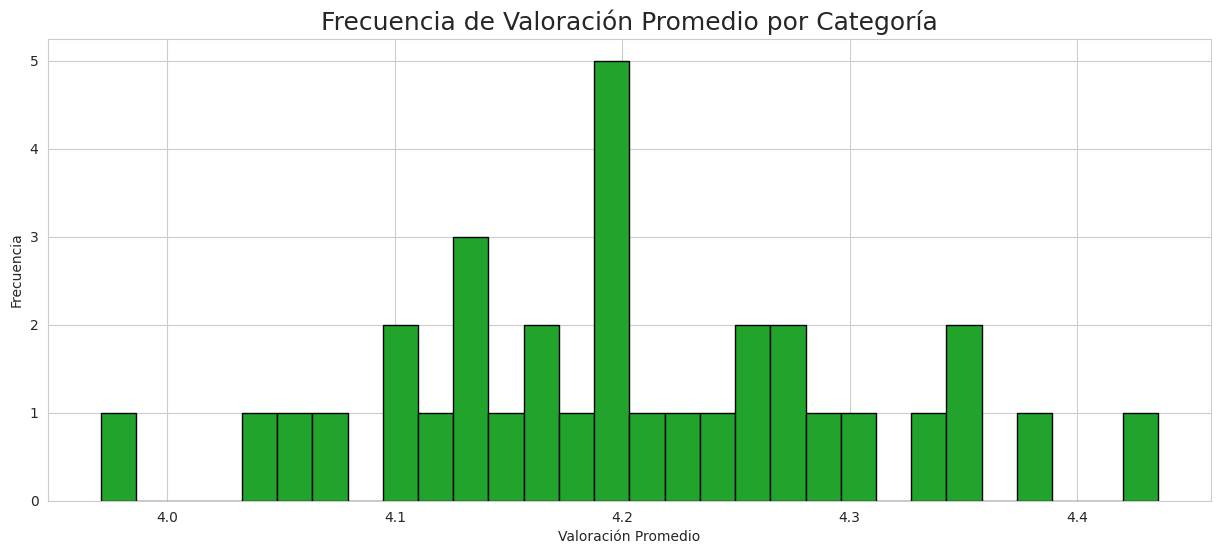

In [7]:
# Histograma
# Creo un dataframe con las categorías y sus ratings promedio para la visualización de la frecuencia.
# Uso 30 bins para tener una visualización clara y no tan cargada de barras.

categorias_rating = play_store.groupby("Category")["Rating"].mean().reset_index()

with sns.axes_style("whitegrid"):
  ax = categorias_rating["Rating"].plot.hist(figsize = (15, 6), bins = 30, color = "#21a32c", edgecolor = "black")
  ax.set_title("Frecuencia de Valoración Promedio por Categoría", fontsize = 18)
  ax.set_xlabel("Valoración Promedio")
  ax.set_ylabel("Frecuencia")
plt.show()

Box Plot

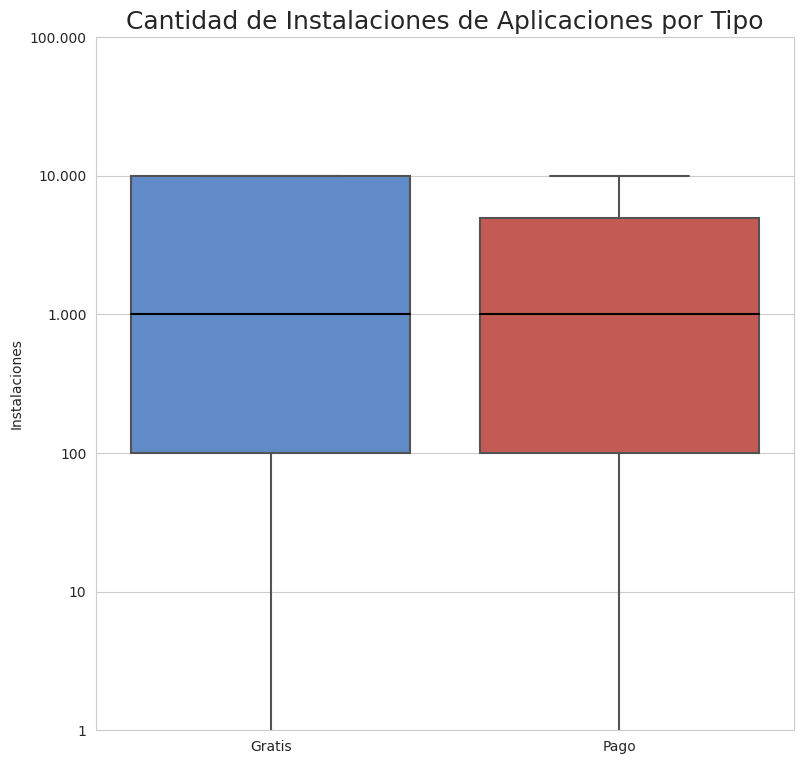

In [8]:
# Box Plot
# Está limitado a 10000 porque hay unos pocos que se van de escala (100.000+), así que los ignoro para el análisis.
# Lo muestro en escala logarítmica porque los datos están organizados de esta manera y se hace más fácil para la visualización.

limite = 10000

with sns.axes_style("whitegrid"):
  plt.figure(figsize = (9, 9))
  colors_box = ["#5086d9", "#d64a40"]
  sns.boxplot(play_store[play_store["Installs"] <= limite], x = "Type", y = "Installs", palette = colors_box, medianprops = {"color": "black"})
  plt.title("Cantidad de Instalaciones de Aplicaciones por Tipo", fontsize = 18)
  plt.xlabel("")
  plt.ylabel("Instalaciones")
  plt.yscale("log")
  plt.yticks([1, 10, 100, 1000, 10000, 100000], labels = ["1", "10", "100", "1.000", "10.000", "100.000"])

plt.show()

Preparo un nuevo dataframe para hacer la visualización del heatmap, agrupando por categoría y el rango del rating las probabilidades de que las aplicaciones sean gratuitas.

In [9]:
# Uso size() para contar la cantidad de filas, incluyendo NaNs, pero no los tomaré en cuenta en el heatmap.
categorias_probabilidad = play_store.groupby(["Category", "Rating Rank"]).size().reset_index(name = "Amount")
categorias_probabilidad = categorias_probabilidad.merge(play_store[["Category", "Rating Rank", "Free Prob"]], on = ["Category", "Rating Rank"])
categorias_probabilidad = categorias_probabilidad.drop_duplicates(["Category", "Rating Rank"])

categorias_probabilidad

,Category,Rating Rank,Amount,Free Prob
0,Arte y Diseño,(3-4),10,1.000000
10,Arte y Diseño,(4-5),52,0.942308
62,Autos y Vehículos,(2-3),3,1.000000
65,Autos y Vehículos,(3-4),24,1.000000
89,Autos y Vehículos,(4-5),46,0.978261
...,...,...,...,...
8885,Social,(3-4),50,0.980000
8935,Social,(4-5),205,0.995122
9140,Viajes y Localidades,(2-3),10,1.000000
9150,Viajes y Localidades,(3-4),61,0.950820


Heatmap

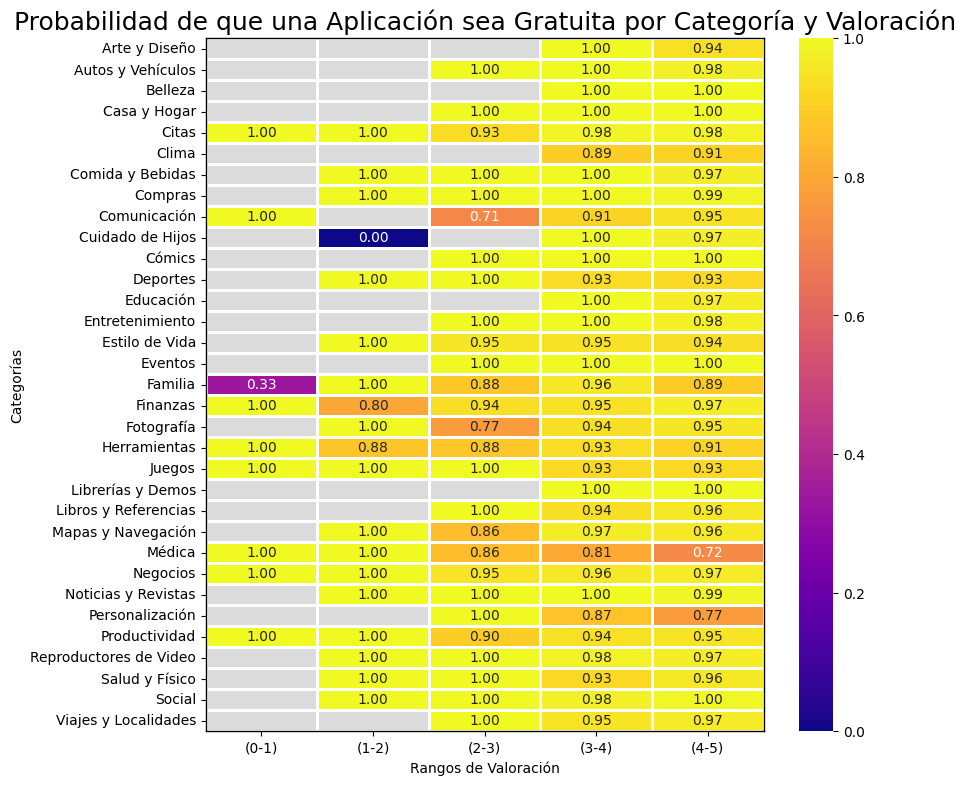

In [10]:
# Heatmap
# No tomo en cuenta los ratings NaN.
# Ratings como, por ejemplo, 4.0 van en el rango (3-4).

play_store_heatmap = categorias_probabilidad.pivot_table(index = "Category", columns = "Rating Rank", values = "Free Prob")

plt.figure(figsize = (9, 9))
sns.heatmap(play_store_heatmap, cmap = "plasma", annot = True, fmt = ".2f", linewidths = 0.8)
ax = plt.gca()
for _, spine in ax.spines.items():
    spine.set_visible(True)
    spine.set_color("black")
    spine.set_linewidth(1)
plt.title("Probabilidad de que una Aplicación sea Gratuita por Categoría y Valoración", fontsize = 18)
plt.xlabel("Rangos de Valoración")
plt.ylabel("Categorías")
ax.set_facecolor("#dbdbdb")

plt.show()

In [11]:
play_store_user = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/googleplaystore_user_reviews.csv");

In [12]:
play_store_user

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
...,...,...,...,...,...
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [13]:
# Cambio los nombres del inglés al español para tener una visualización clara en el plot.
play_store_user.rename(columns = {"Sentiment": "Sentimiento"}, inplace = True)
play_store_user.rename(columns = {"Sentiment_Polarity": "Polaridad del Sentimiento"}, inplace = True)
play_store_user.rename(columns = {"Sentiment_Subjectivity": "Subjetividad del Sentimiento"}, inplace = True)
play_store_user["Sentimiento"] = play_store_user["Sentimiento"].replace("Positive", "Positivo")
play_store_user["Sentimiento"] = play_store_user["Sentimiento"].replace("Negative", "Negativo")


Scatter Plot

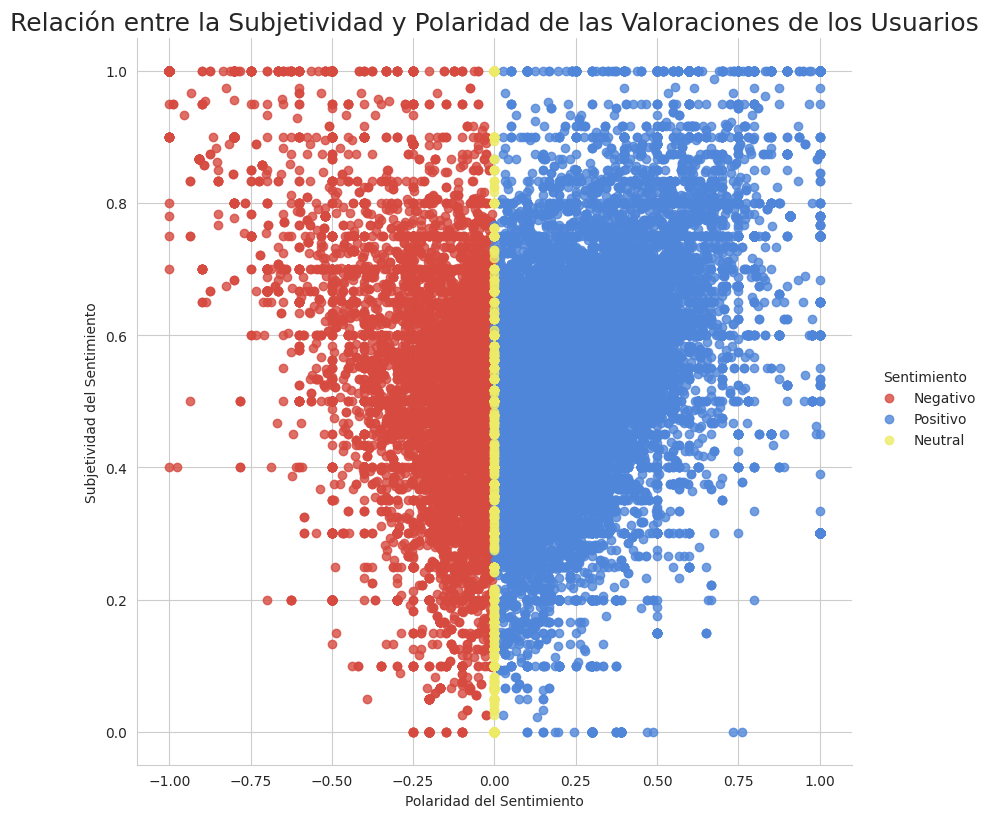

In [14]:
# Scatter Plot
# No tomo en cuenta los NaN en la visualización.

colors_scatter = {"Positivo": "#5086d9", "Neutral": "#edeb66", "Negativo": "#d64a40"}
order_scatter = ["Negativo", "Positivo", "Neutral"]

with sns.axes_style("whitegrid"):
  sns.lmplot(x = "Polaridad del Sentimiento", y = "Subjetividad del Sentimiento", data = play_store_user, fit_reg = False, hue = "Sentimiento", hue_order = order_scatter, palette = colors_scatter, legend = True, height = 8)
  plt.title("Relación entre la Subjetividad y Polaridad de las Valoraciones de los Usuarios", fontsize = 18)

plt.show()